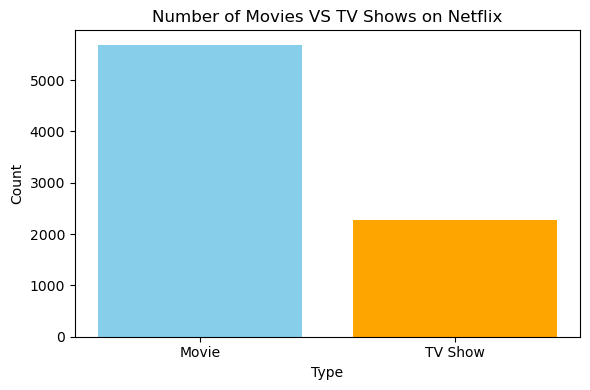

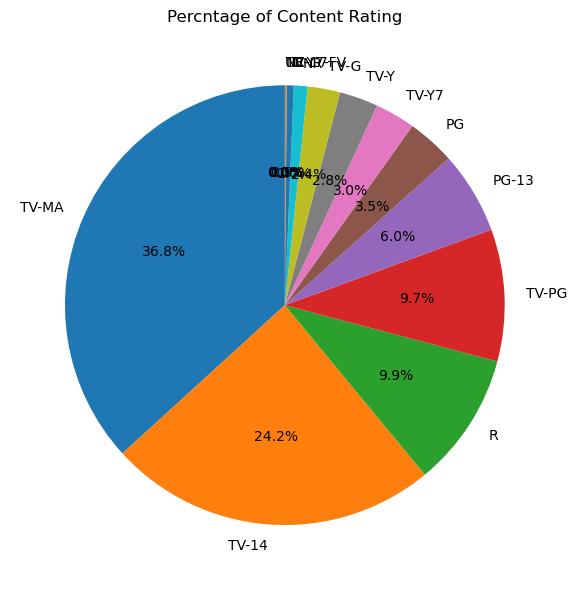

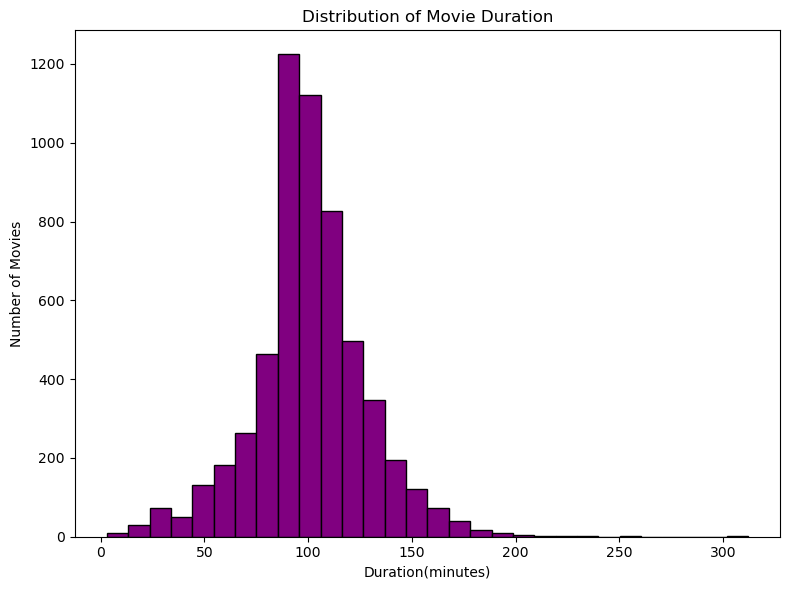

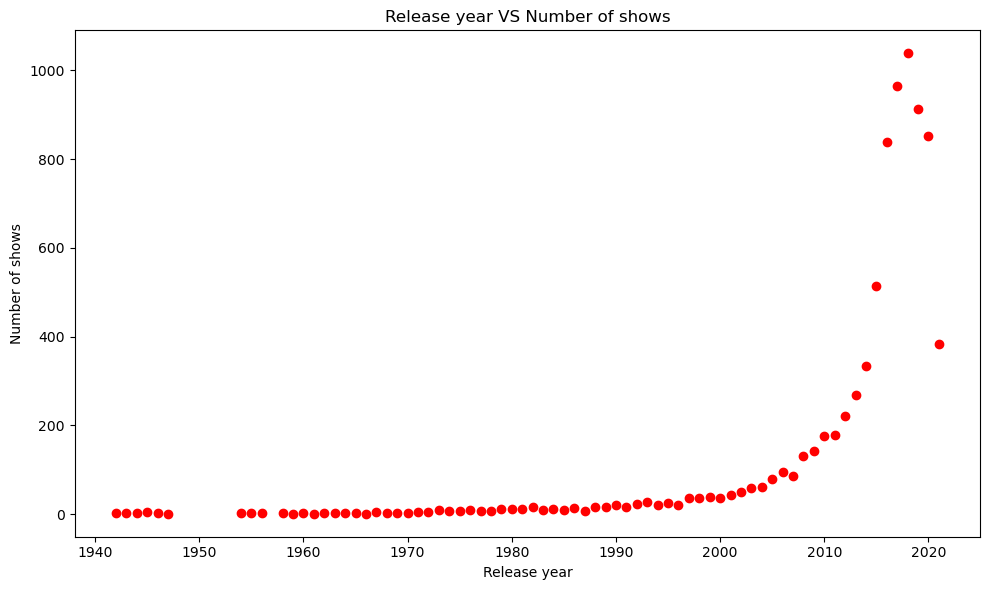

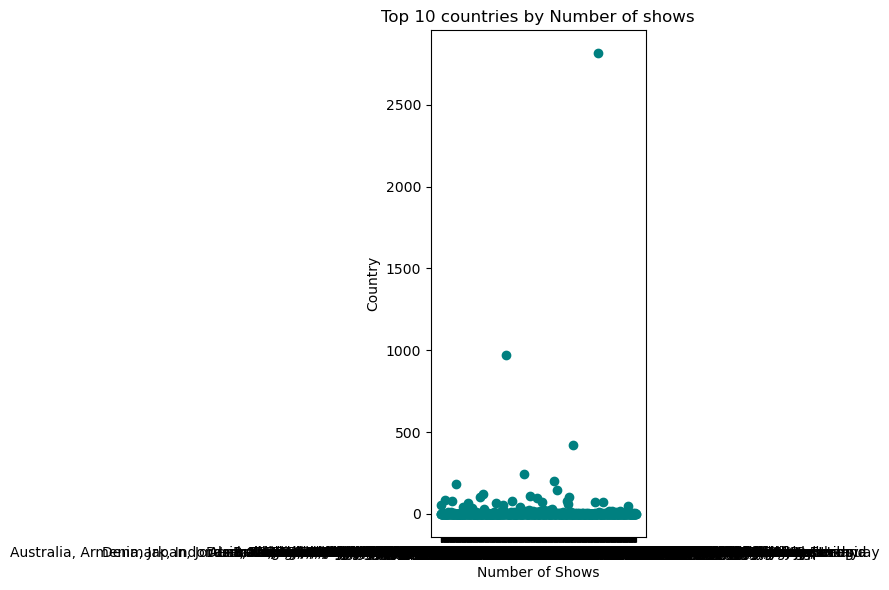

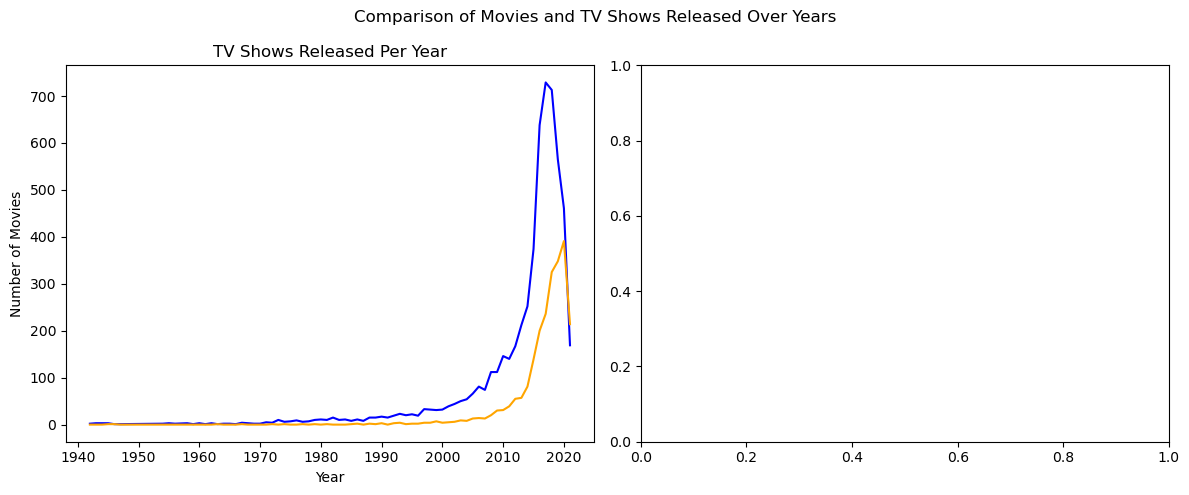

In [15]:
#s-1 import the libraries

import pandas as pd
import matplotlib.pyplot as plt

# load the data

df=pd.read_csv('netflix_titles.csv')

#clean data

df=df.dropna(subset=['type','release_year','rating','country','duration'])
type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
plt.title('Number of Movies VS TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()


rating_counts=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Percntage of Content Rating')
plt.tight_layout()
plt.savefig('content_Ratings_pie.png')
plt.show()

movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration(minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values, color='red')
plt.title('Release year VS Number of shows')
plt.xlabel('Release year')
plt.ylabel('Number of shows')
plt.tight_layout()
plt.savefig('release_year_Scatter.png')
plt.show()


country_counts=df['country'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.scatter(country_counts.index,country_counts.values, color='teal')
plt.title('Top 10 countries by Number of shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()



content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)
fig , ax = plt.subplots(1,2, figsize=(12,5))
#first subplot:movies
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')
#second subplot:TV Shows
ax[0].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[0].set_title('TV Shows Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')
fig.suptitle('Comparison of Movies and TV Shows Released Over Years')
plt.tight_layout()
plt.savefig('movies_tv_shows_coparison.png')
plt.show()